In [1]:
def parse_array(in_array):
    new_array = []
    for i in range(len(in_array)):
        if str(in_array[i]).find("foreign")>0:
            new_array.append("foreign")
        if str(in_array[i]).find("russian")>0:
            new_array.append("russian")
        if (str(in_array[i]).find("foreign")<0 and 
            str(in_array[i]).find("russian")<0):
#             print(i)
            new_array.append("unknown")
    return new_array

def find_russian(Q):
    idx = []
    for i in range(len(Q)):
        if Q[i] == 'russian':
            idx.append(i)
    return(idx)

In [6]:
import scipy.io as sio

# load https://cs1.neuroimaging.group/user/nightman/notebooks/home/NEW_DL/EEGnet_CNN_Dense_Binary_Classifier_TD_1D.ipynb#data from the .mat file:
# mat_contents = sio.loadmat('EEG_big.mat') # (EEG_data.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN_1subj.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_noICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->0.5-38Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-48Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_TD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0101T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0202T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0303T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0403T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0503T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0603T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0703T_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_0801T_TD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_2TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ksenia2_long_chunked.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_fullspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_lowspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->1-38Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-100Hz,Env=1_FD')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-47Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD5_64_.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->75-134Hz,Env=1_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->2-30Hz,Env=1_TD5_64_.mat')

# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD1_94_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD101_192_.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD197_289_.mat')


# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged456->2-30Hz,Env=1_TD1_289_.mat')
# mat_contents = sio.loadmat(
#             '/home/amplifier/home/DATASETS/Merged123, DS2=80Hz, FIR=1-9Hz, centnorm=1, Env=1, TD, 143-202.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/DAS_CH.mat, DS2=250Hz, FIR=1-30Hz, centnorm=1, Env=1, TD, 1-124.mat')

# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/DAS_CH_AVG_500Hz_2.mat, DS2=100Hz, FIR=1-9Hz, centnorm=1, Env=1, TD, 1-124.mat')
# mat_contents = sio.loadmat(
#     '/home/amplifier/home/DATASETS/DAS_CH_AVG_500Hz_2.mat, DS2=100Hz, FIR=1-40Hz, centnorm=1, Env=1, TD, 1-124.mat')
mat_contents = sio.loadmat(
    '/home/amplifier/home/DATASETS/Merged123_1_64_ICA(-eyes)AUDpreproc.mat, DS2=64Hz, FIR=1-9Hz, centnorm=1, Env=1, TD, 1-90.mat')

SHUFFLE = True
BATCH_SIZE = 20
TEST_TRAIN = 0.2

KERNEL_SIZE = (30, 15, 15, 30, 2) # (100, 50, 50, 100, 1) #
N_KERNELS = (60,30,30,60,1)
POOL_SIZE = (2,2)


DROPOUT = (0.1, 0.2, 0.3, 0.5)

In [7]:
# get the Dataset:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = mat_contents['X']
Y = mat_contents['Y']
Z = mat_contents['Z']
Q = parse_array(mat_contents['Q'])

# idx = find_russian(Q)
# X = X[idx,:,:]
# Y = Y[idx,:]
# Z = Z[idx,:]
# Q = [Q[i] for i in idx]

if X.shape[1]<X.shape[2]:
    X = np.transpose(X,[0,2,1])

# if Y.shape[1] > Y.shape[0]:
#     Y = Y.T
    
print('Original data shape:', X.shape)
print('Audio shape:', Y.shape)
print('Original labels shape:', Z.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test, z_train, z_test, q_train, q_test = train_test_split(X, Y, Z, Q, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
z_train = z_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')
z_test = z_test.astype('float64')

# normalize to unit variance and zero mean:
for i in range(x_train.shape[0]):
    x_train[i,:,:] = preprocessing.scale(x_train[i,:,:], axis=1)
    x_train[i,:,:] = preprocessing.minmax_scale(x_train[i,:,:], axis=1)
    y_train[i,:] = preprocessing.scale(y_train[i,:], axis=0)
    y_train[i,:] = preprocessing.minmax_scale(y_train[i,:], axis=0)

for i in range(x_test.shape[0]):
    x_test[i,:,:] = preprocessing.scale(x_test[i,:,:], axis=1)
    x_test[i,:,:] = preprocessing.minmax_scale(x_test[i,:,:], axis=1)
    y_test[i,:] = preprocessing.scale(y_test[i,:], axis=0)
    y_test[i,:] = preprocessing.minmax_scale(y_test[i,:], axis=0)

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
z_train = onehot_encoder.fit_transform(z_train)
z_test = onehot_encoder.fit_transform(z_test)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
z_train = z_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
z_test = z_test.astype('float16')

leng = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
chan = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1
    
y_test = np.expand_dims(y_test,-1)
y_train = np.expand_dims(y_train,-1)

print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test audio shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train audio shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

print('test labels shape', z_test.shape, "Nomralized MEAN:", np.mean(z_test), "min", np.min(z_test),"max", np.max(z_test))
print('train labels shape', z_train.shape, "Nomralized MEAN:", np.mean(z_train), "min", np.min(z_train),"max", np.max(z_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

Original data shape: (870, 128, 60)
Audio shape: (870, 128)
Original labels shape: (870, 1)
Original data type: float32
test input shape (174, 128, 60) Nomralized MEAN: 0.50293 min 0.0 max 1.0
train input shape (696, 128, 60) Nomralized MEAN: 0.50293 min 0.0 max 1.0
test audio shape (174, 128, 1) Nomralized MEAN: 0.28613 min 0.0 max 1.0
train audio shape (696, 128, 1) Nomralized MEAN: 0.27539 min 0.0 max 1.0
test labels shape (174, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (696, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [8]:
# we first define the autoencoder's architecture:

# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

from keras.layers import Input, Dense, Conv1D, UpSampling1D, Reshape, Lambda
from keras.layers import MaxPooling1D, Dropout, BatchNormalization, Flatten, ELU, Activation
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers
from keras.initializers import Orthogonal as orth

import numpy as np
import matplotlib.pyplot as plt

def activation():
    return Activation('relu') #ELU(alpha=1.0) # 

def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)

def Squeeze(input_img):
    return K.squeeze(input_img, axis=2)

def conv_net(leng):
    input_img = Input(shape=(leng, chan))  # adapt this if using `channels_first` image
    input_norm = BatchNormalization()(input_img)
    
    e2 = Conv1D(N_KERNELS[0], KERNEL_SIZE[0], padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(input_norm)
    e2act = activation()(e2)
    e2p = MaxPooling1D(pool_size=POOL_SIZE[0], strides=None, padding='same')(e2act)
    e2b = BatchNormalization()(e2p)
    e2a = Dropout(DROPOUT[0])(e2b)
    
    
    e3 = Conv1D(N_KERNELS[1], KERNEL_SIZE[1], padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e2a)
    e3act = activation()(e3)
    e3p = MaxPooling1D(pool_size=POOL_SIZE[1], strides=None, padding='same')(e3act)
    e3b = BatchNormalization()(e3p)
    e3a = Dropout(DROPOUT[1])(e3b)
    
    
    e4 = Conv1D(N_KERNELS[2], KERNEL_SIZE[2], padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e3a)
    e4act = activation()(e4)
    e4u = UpSampling1D(size=2)(e4act)
    e4b = BatchNormalization()(e4u)
    e4a = Dropout(DROPOUT[2])(e4b)
    
    
    e5 = Conv1D(N_KERNELS[3], KERNEL_SIZE[3], padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e4a)
    e5act = activation()(e5)
    e5u = UpSampling1D(size=2)(e5act)
    e5b = BatchNormalization()(e5u)
    e5a = Dropout(DROPOUT[3])(e5b)
    
    
    e6 = Conv1D(N_KERNELS[4], KERNEL_SIZE[4], padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e5a)
    e6act = activation()(e6)
    e6b = BatchNormalization()(e6act)
#     e6r = Lambda(Squeeze)(e6b)
    
    return Model(input_img, e6b)

In [9]:
# define input to the model:
x = Input(shape=(leng, chan))

# make the model:
model = conv_net(leng)

# compile the model:
# sgd = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.95, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss=correlation_coefficient_loss)
model.compile(optimizer='adadelta', loss=correlation_coefficient_loss)
model.compile(optimizer='adadelta', loss='mean_squared_error')


# SEE INSIDE THE MODEL:
# conv_net().summary() #or
model.summary()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 60)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 60)           240       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 60)           108060    
_________________________________________________________________
activation_1 (Activation)    (None, 128, 60)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 60)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 60)            240       
___________________________________________________________

In [10]:
##########################################################

# Training time!
# Try 20 epochs using batch size = 3, then switch to 4
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min')
checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5',
                               verbose=1,
                               monitor='val_loss',
                               save_best_only=True)
# TB = TensorBoard(log_dir='/home/amplifier/home/CNN_stim')

train_history = model.fit(x_train, y_train,
                epochs=400,
                batch_size=BATCH_SIZE,
                verbose=2,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[early_stopping, checkpointer])

# save the entire model and the weights after the training:
# model.save('/home/amplifier/home/NEW_DL/models/EEGnet.h5')
# model.save_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_weights.h5')

Train on 696 samples, validate on 174 samples
Epoch 1/400
 - 4s - loss: 1.0764 - val_loss: 1.9063

Epoch 00001: val_loss improved from inf to 1.90631, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5
Epoch 2/400
 - 1s - loss: 0.9216 - val_loss: 0.9919

Epoch 00002: val_loss improved from 1.90631 to 0.99189, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5
Epoch 3/400
 - 1s - loss: 0.7908 - val_loss: 1.0188

Epoch 00003: val_loss did not improve
Epoch 4/400
 - 1s - loss: 0.6769 - val_loss: 0.8666

Epoch 00004: val_loss improved from 0.99189 to 0.86662, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5
Epoch 5/400
 - 1s - loss: 0.5800 - val_loss: 0.6162

Epoch 00005: val_loss improved from 0.86662 to 0.61625, saving model to /home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5
Epoch 6/400
 - 1s - loss: 0.4923 - val_loss: 0.5445

Epoch 00006: val_loss improved from 0.

KeyboardInterrupt: 

In [11]:
# print(np.array(history.losses))
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.title('AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'train_history' is not defined

In [12]:
model.load_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_weights_1D_RECONST_NEW.h5')
# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

(696, 128, 1)
(174, 128, 1)


Layer number: 2 Layer name: conv1d_1
(30, 60, 60)


Text(0.5,0.98,'Convolution kernels in layer conv1d_1')

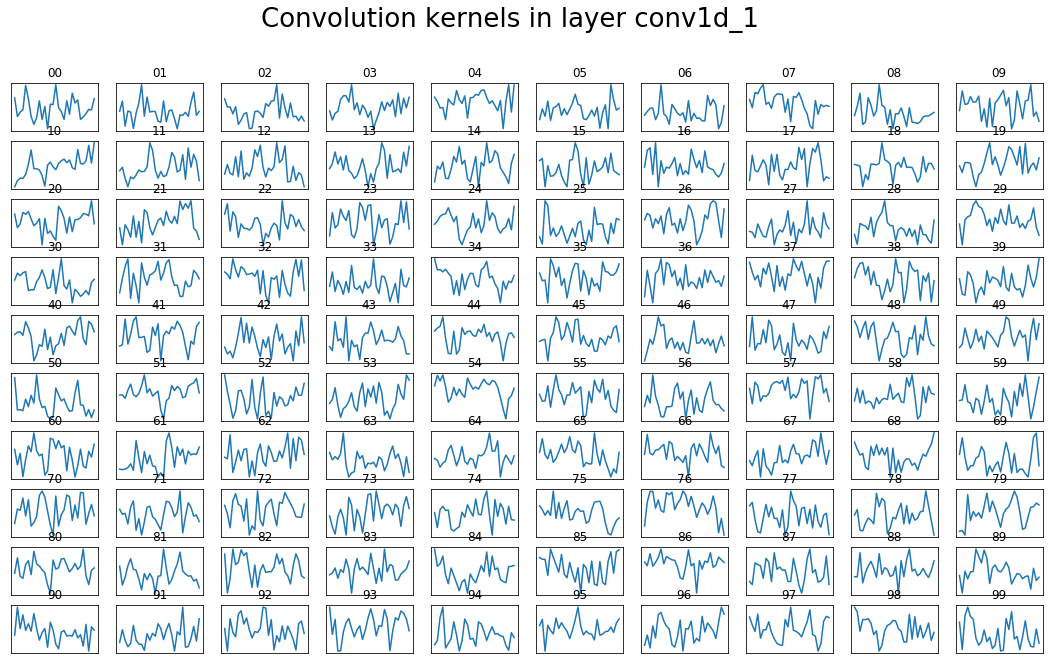

In [13]:
# Visualize a few kernels from the first convolutional layer:
# enc.layers[2].get_config()
# dir(enc.layers[2])
x = model.layers[2].get_weights()
print ('Layer number:', 2, 'Layer name:', model.layers[2].name)
sh = x[0].shape
print(sh) # kernel length x input channels x output channels

I = 10 # sh[1]
J = 10 # sh[2]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].plot(x[0][:,i,j])
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(i)+str(j))
        c = c + 1
plt.suptitle('Convolution kernels in layer ' + model.layers[2].name, fontsize=26)

Average testing R: 0.258513


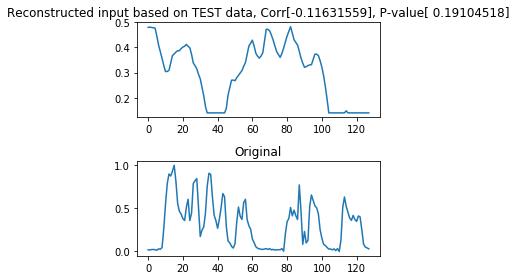

In [14]:
reconstruct_training_sample = False
samp = 4

from scipy.stats import pearsonr
# now let's see how the model performs:

if (reconstruct_training_sample==True):
    reconst = decoded_train[samp,:]
    orig = y_train[samp,:]
    R,p = pearsonr(reconst, orig)
    title = "Reconstructed input based on TRAINING data, " + "Corr"+ str(R) + ", P-value" + str(p)
    
else:
    reconst = decoded_test[samp,:]
    orig = y_test[samp,:]
    R,p = pearsonr(reconst, orig)
    title = "Reconstructed input based on TEST data, " + "Corr"+ str(R) + ", P-value" + str(p)

%matplotlib inline
plt.subplot(211)
plt.plot(reconst)
ax = plt.gca()
ax.set_title(title)
plt.subplot(212)
plt.plot(orig)
ax = plt.gca()
ax.set_title("Original")
plt.tight_layout()

R_test = []
for i in range(len(decoded_test)):
    R,p = pearsonr(decoded_test[i,:], y_test[i,:])
    R_test.append(R)
print('Average testing R:', np.mean(R_test))
# R_test


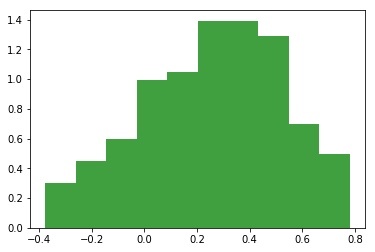

In [15]:
n, bins, patches = plt.hist(np.array(R_test), 10, normed=1, facecolor='green', alpha=0.75)

In [16]:
TT = []
for i in range(len(R_test)):
#     print(z_test[i][0])
    if (R_test[i]>0) and (z_test[i][0]==1):
#         print('success')
        TT.append(1)
    else:
        TT.append(0)
#         print('fail')
print(np.mean(TT))
        

0.413793103448


Average training R: 0.718598


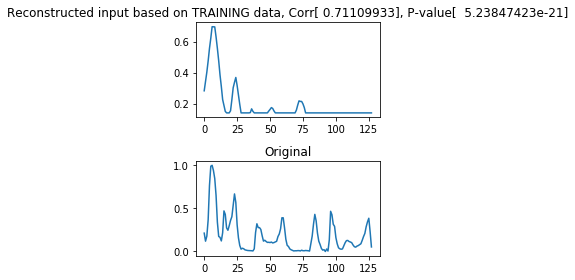

In [17]:
reconstruct_training_sample = True
samp = 6

from scipy.stats import pearsonr
# now let's see how the model performs:

if (reconstruct_training_sample==True):
    reconst = decoded_train[samp,:]
    orig = y_train[samp,:]
    R,p = pearsonr(reconst, orig)
    title = "Reconstructed input based on TRAINING data, " + "Corr"+ str(R) + ", P-value" + str(p)
    
else:
    reconst = decoded_test[samp,:]
    orig = y_test[samp,:]
    R,p = pearsonr(reconst, orig)
    title = "Reconstructed input based on TEST data, " + "Corr"+ str(R) + ", P-value" + str(p)

%matplotlib inline
plt.subplot(211)
plt.plot(reconst)
ax = plt.gca()
ax.set_title(title)
plt.subplot(212)
plt.plot(orig)
ax = plt.gca()
ax.set_title("Original")
plt.tight_layout()


R_train = []
for i in range(len(decoded_train)):
    R,p = pearsonr(decoded_train[i,:], y_train[i,:])
    R_train.append(R)
print('Average training R:', np.nanmean(R_train))
# R_train

In [68]:
# log performance to file:
# import csv   
# fields=['1D', 'MY04', np.mean(cor_test), np.mean(cor_train)]
# with open(r'/home/amplifier/home/NEW_DL/weights/document.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerow(fields)

In [18]:
W = []
GT = []

for i in range(len(decoded_test)):
    if decoded_test[i][0]<decoded_test[i][1]:
        W.append('right')
    if decoded_test[i][0]>decoded_test[i][1]:
        W.append('left')

    if y_test[i][0]<y_test[i][1]:
        GT.append('right')
    if y_test[i][0]>y_test[i][1]:
        GT.append('left')
        
from sklearn.metrics import confusion_matrix
labels = ['left', 'right'] # 1 for right, 0 for left
cm = confusion_matrix(GT, W, labels)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.matshow(cm)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [173, 146]

In [ ]:
# Visualize a few kernels from the first convolutional layer:
# enc.layers[2].get_config()
# dir(enc.layers[2])
x = model.layers[2].get_weights()
print ('Layer number:', 2, 'Layer name:', model.layers[2].name)
sh = x[0].shape
print(sh) # kernel length x input channels x output channels

I = sh[1]
J = sh[2]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].plot(x[0][:,i,j])
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(i)+str(j))
        c = c + 1
plt.suptitle('Convolution kernels in layer ' + model.layers[2].name, fontsize=26)

In [ ]:
get_1st_conv_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output = get_1st_conv_layer_output([np.expand_dims(x_train[3],0)])[0]

im = layer_output[-1,:,:]
plt.imshow(im.T)
plt.suptitle(('Output of layer ' + model.layers[2].name), fontsize=26)

In [ ]:
import scipy.fftpack

x = model.layers[2].get_weights()

I = x[0].shape[1]
J = x[0].shape[2]
c = 0

fs = 250
T = 1/fs * x[0].shape[0]
f = 50
t = np.arange(0,T, 1/fs)

fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        y = x[0][:,i,j].reshape(KERNEL_SIZE[0],1)
        yf = scipy.fftpack.fft(y, axis=0)

        YF = np.abs(yf)
        xf = np.linspace(0,fs/2, YF.shape[0]/2)
        YF_trunc = YF[0:int(len(YF)/2),-1]
        axs[c].plot(xf, YF_trunc)
        axs[c].get_xaxis().set_visible(True)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(i)+str(j))
        c = c + 1

plt.tight_layout()
plt.suptitle('FFT of kernels in layer ' + model.layers[2].name, fontsize=26)

In [ ]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
# import pandas as pd
# df = pd.read_csv('/home/amplifier/home/NEW_DL/weights/document.csv')

In [28]:
# import csv   
# fields=['algorithm', 'dataset', 'val_acc', 'acc']
# with open(r'/home/amplifier/home/NEW_DL/weights/document.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(fields)

In [ ]:
# df[df.algorithm=='1D'].acc.min()